<a href="https://colab.research.google.com/github/Enamulla577/EVAI/blob/main/Session12/AssignmentB/Clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [ ]:
import requests
import json
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import os
import numpy as np
sns.set()
plt.style.use("dark_background")

In [ ]:
!git clone https://github.com/Enamulla577/EVAI

Cloning into 'EVAI'...
remote: Enumerating objects: 147, done.
remote: Counting objects: 100% (147/147), done.
remote: Compressing objects: 100% (137/137), done.
remote: Total 344 (delta 44), reused 0 (delta 0), pack-reused 197
Receiving objects: 100% (344/344), 13.11 MiB | 18.51 MiB/s, done.
Resolving deltas: 100% (125/125), done.


In [ ]:
BASE_DIR = 'EVAI/Session12/AssignmentB/'

## Download Dooggo Annotation

In [ ]:
open(os.path.join(BASE_DIR, 'annotations.json'), 'wb')

<_io.BufferedWriter name='EVAI/Session12/AssignmentB/annotations.json'>

## Load the JSON

In [ ]:
with open('EVAI/Session12/AssignmentB/annotations.json') as fp:
    data = json.load(fp)

JSONDecodeError: ignored

## Dump single entry from annotations

### Exaplanation of the json file

The JSON file is basically a Key: Value pair dumped in a text format

The root key is the image_name and the value is attributes like
- filename: the name of the file with extension
- size: space that the image takes
- regions: this is an array consisting of the bounding boxes
    - shape_attributes: how the bbox is defined, could be a circle, rectangle, etc, its x, y coordinates and the height and width of the box
    - region_attributes: this contained the label for the region, here 'dog', and some meta data like if the image is blurry, has good illumination, etc
- file_attributes: extra meta data of the image file, like the URL, caption and if it was from public domain

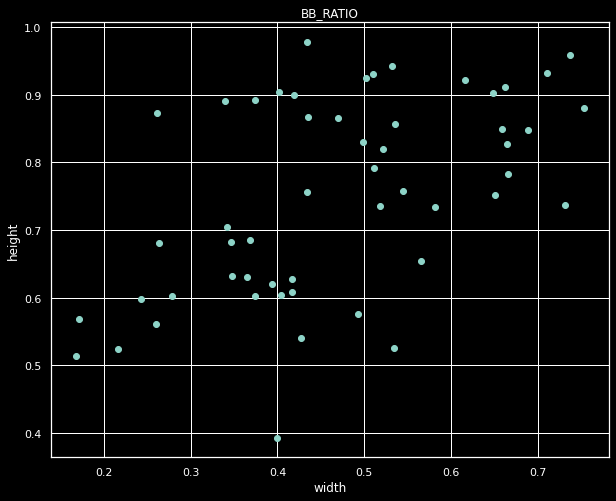

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(bbratio[:,0], bbratio[:,1], cmap="tab10")
plt.xlabel('width')
plt.ylabel('height')
plt.title('BB_RATIO')
plt.show()

# K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans

## Using Elbow Method to find cluster centers

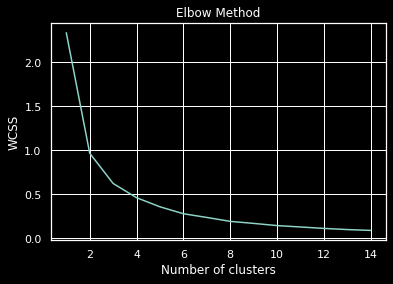

In [ ]:
wcss = []
for c in range(1, 15):
    kmeans = KMeans(n_clusters=c, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(bbratio)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Choosing 4 clusters a optimum

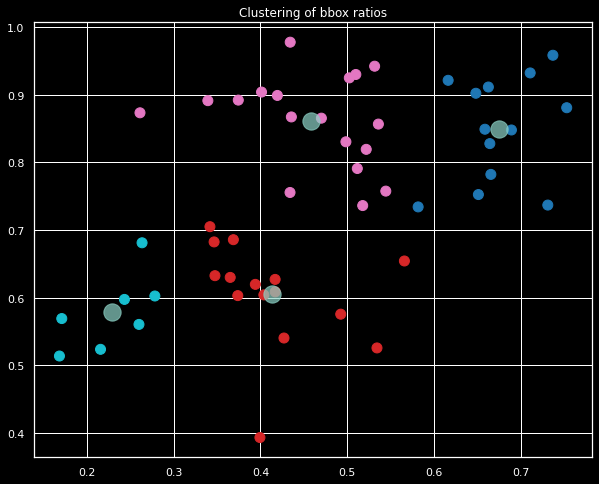

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(bbratio)
plt.figure(figsize=(10,8))
plt.scatter(bbratio[:,0], bbratio[:,1], c=pred_y, cmap="tab10", s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, alpha=.7)
plt.title('Clustering of bbox ratios')
plt.show()

## Dump entire JSON